#Exercise 1

**Part1**

In [12]:
!pip install -q pyomo
!apt-get install -y -qq glpk-utils

In [13]:
from pyomo.environ import*
import pandas as pd
import numpy as np


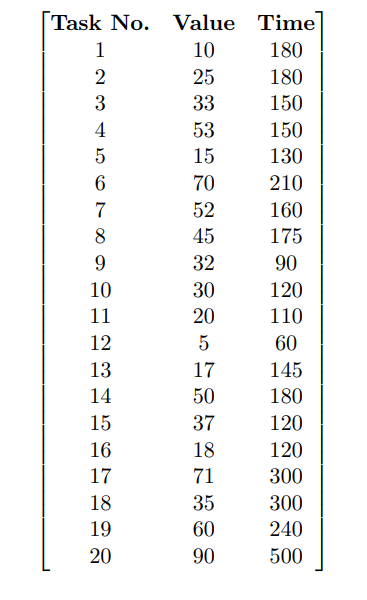

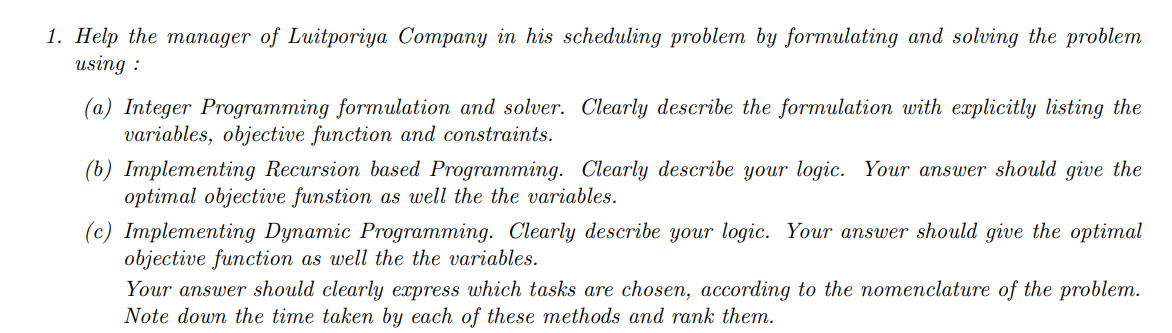

In [14]:
value=[10,25,33,53,15,70,52,45,32,30,20,5,17,50,37,18,71,35,60,90]
time=[180,180,150,150,130,210,160,175,90,120,110,60,145,180,120,120,300,300,240,500]
len(time)

20

In [15]:
model = ConcreteModel()
model.y = Var(range(20), domain = Binary)

model.objective = Objective(expr = sum(value[i]*model.y[i] for i in range(20)), sense = maximize)

model.constraints = ConstraintList()


model.constraints.add(expr = sum(time[j]*model.y[j] for j in range(20)) <=2400)

result = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model)

In [16]:
model.pprint()

1 Var Declarations
    y : Size=20, Index={0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   0.0 :     1 : False : False : Binary
          1 :     0 :   0.0 :     1 : False : False : Binary
          2 :     0 :   1.0 :     1 : False : False : Binary
          3 :     0 :   1.0 :     1 : False : False : Binary
          4 :     0 :   0.0 :     1 : False : False : Binary
          5 :     0 :   1.0 :     1 : False : False : Binary
          6 :     0 :   1.0 :     1 : False : False : Binary
          7 :     0 :   1.0 :     1 : False : False : Binary
          8 :     0 :   1.0 :     1 : False : False : Binary
          9 :     0 :   1.0 :     1 : False : False : Binary
         10 :     0 :   0.0 :     1 : False : False : Binary
         11 :     0 :   0.0 :     1 : False : False : Binary
         12 :     0 :   0.0 :     1 : False : False : Binary
         13 :     0 :   1.0 :    

In [17]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 623.0
  Upper bound: 623.0
  Number of objectives: 1
  Number of constraints: 1
  Number of variables: 20
  Number of nonzeros: 20
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 3
      Number of created subproblems: 3
  Error rc: 0
  Time: 0.0050716400146484375
# ----------------------------------------------------------
#   Solution Information
# ---------------------------------

In [18]:
# display solution
print('Objective Value Attained is like: ',model.objective())
print('\nDecision Variables')
for i in range(20):
  print(f'y{i} = { model.y[i]()}')

print('\nConstraints for the above problem is')
(f'Constraint  =  {model.constraints[1]()}')

Objective Value Attained is like:  623.0

Decision Variables
y0 = 0.0
y1 = 0.0
y2 = 1.0
y3 = 1.0
y4 = 0.0
y5 = 1.0
y6 = 1.0
y7 = 1.0
y8 = 1.0
y9 = 1.0
y10 = 0.0
y11 = 0.0
y12 = 0.0
y13 = 1.0
y14 = 1.0
y15 = 0.0
y16 = 1.0
y17 = 0.0
y18 = 1.0
y19 = 1.0

Constraints for the above problem is


'Constraint  =  2395.0'

In [19]:
def schedule_task_rec(tasks, n, max_time, task_indices=[], max_value=0, current_time=0):


    if n == 0 or current_time >= max_time:
        # we will calculate the total value of selected task
        total_value = sum(tasks[i][1] for i in task_indices)
        # we will return the total value and their respective task indices
        return total_value, task_indices

    # If including the current task exceeds the time limit, skip it
    if current_time + tasks[n - 1][2] > max_time:
        return schedule_task_rec(tasks, n - 1, max_time, task_indices, max_value, current_time)

    # Check if the current task should be included or excluded
    included_value, included_indices = schedule_task_rec(tasks, n - 1, max_time, task_indices + [n - 1], max_value, current_time + tasks[n - 1][2])
    excluded_value, excluded_indices = schedule_task_rec(tasks, n - 1, max_time, task_indices, max_value, current_time)

    # Return the maximum value and corresponding task indices
    if included_value > excluded_value:
        return included_value, included_indices
    else:
        return excluded_value, excluded_indices

# Tasks table: [Task No., Value, Time]
tasks = [
    [1, 10, 180], [2, 25, 180], [3, 33, 150], [4, 53, 150], [5, 15, 130],
    [6, 70, 210], [7, 52, 160], [8, 45, 175], [9, 32, 90], [10, 30, 120],
    [11, 20, 110], [12, 5, 60], [13, 17, 145], [14, 50, 180], [15, 37, 120],
    [16, 18, 120], [17, 71, 300], [18, 35, 300], [19, 60, 240], [20, 90, 500]
]

max_time = 2400
max_value, optimal_task_indices = schedule_task_rec(tasks, len(tasks), max_time)

# Print the results
print("The schedule of optimal task is like that:")
for idx in optimal_task_indices:
    print(f"Task {tasks[idx][0]} (Value: {tasks[idx][1]}, Time: {tasks[idx][2]})")

print("Total Value:", max_value)

The schedule of optimal task is like that:
Task 20 (Value: 90, Time: 500)
Task 19 (Value: 60, Time: 240)
Task 17 (Value: 71, Time: 300)
Task 15 (Value: 37, Time: 120)
Task 14 (Value: 50, Time: 180)
Task 10 (Value: 30, Time: 120)
Task 9 (Value: 32, Time: 90)
Task 8 (Value: 45, Time: 175)
Task 7 (Value: 52, Time: 160)
Task 6 (Value: 70, Time: 210)
Task 4 (Value: 53, Time: 150)
Task 3 (Value: 33, Time: 150)
Total Value: 623


In [20]:
def sch_task_dp(tasks, max_time):
    n = len(tasks)
    # Create a 2D table to store the results of subproblems
    res_sub = [[0] * (max_time + 1) for _ in range(n + 1)]
    # Fill the res_sub table
    for i in range(1, n + 1):
        for j in range(1, max_time + 1):
            # If the current task's time exceeds the available time, skip it
            if tasks[i - 1][2] > j:
                res_sub[i][j] = res_sub[i - 1][j]
            else:
                # Check if including the current task would give a higher value
                res_sub[i][j] = max(res_sub[i - 1][j], res_sub[i - 1][j - tasks[i - 1][2]] + tasks[i - 1][1])

    # Trace back to find the tasks included in the schedule
    selected_tasks = []
    i, j = n, max_time
    while i > 0 and j > 0:
        if res_sub[i][j] != res_sub[i - 1][j]:
            selected_tasks.append(tasks[i - 1][0])
            j -= tasks[i - 1][2]
        i -= 1
    # Return the maximum value and the selected tasks
    return res_sub[n][max_time], selected_tasks

# Tasks table: [Task No., Value, Time]
tasks = [
    [1, 10, 180], [2, 25, 180], [3, 33, 150], [4, 53, 150], [5, 15, 130],
    [6, 70, 210], [7, 52, 160], [8, 45, 175], [9, 32, 90], [10, 30, 120],
    [11, 20, 110], [12, 5, 60], [13, 17, 145], [14, 50, 180], [15, 37, 120],
    [16, 18, 120], [17, 71, 300], [18, 35, 300], [19, 60, 240], [20, 90, 500]
]

max_time = 2400
max_value, optimal_task_indices = sch_task_dp(tasks, max_time)

# Print the results
print("The schedule of optimal task is like:")
for task_no in optimal_task_indices:
    print(f"Task {task_no}")

print("Total Value is:", max_value)

The schedule of optimal task is like:
Task 20
Task 19
Task 17
Task 15
Task 14
Task 10
Task 9
Task 8
Task 7
Task 6
Task 4
Task 3
Total Value is: 623


**part2**

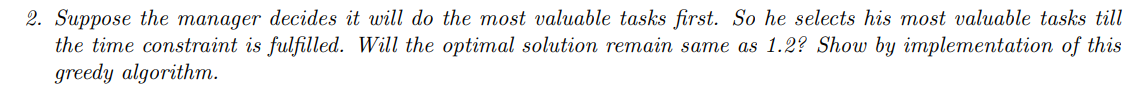

In [21]:
def sch_task_greedy(tasks, max_time):
    # Sort tasks in descending order of value
    sorted_tasks = sorted(tasks, key=lambda x: x[1], reverse=True)
    total_value = 0
    selected_tasks = []
    total_time = 0
    # Iterate through sorted tasks and select until time constraint is fulfilled
    for task in sorted_tasks:
        if total_time + task[2] <= max_time:
            selected_tasks.append(task[0])
            total_value += task[1]
            total_time += task[2]
        else:
            break
    return total_value, selected_tasks

# Tasks table: [Task No., Value, Time]
tasks = [
    [1, 10, 180], [2, 25, 180], [3, 33, 150], [4, 53, 150], [5, 15, 130],
    [6, 70, 210], [7, 52, 160], [8, 45, 175], [9, 32, 90], [10, 30, 120],
    [11, 20, 110], [12, 5, 60], [13, 17, 145], [14, 50, 180], [15, 37, 120],
    [16, 18, 120], [17, 71, 300], [18, 35, 300], [19, 60, 240], [20, 90, 500]
]

max_time = 2400
max_value, optimal_task_indices = sch_task_greedy(tasks, max_time)

# Print the results
print("The schedule of optimal task is like:")
for task_no in optimal_task_indices:
    print(f"Task {task_no}")

print("Total Value is:", max_value)

The schedule of optimal task is like:
Task 20
Task 17
Task 6
Task 19
Task 4
Task 7
Task 14
Task 8
Task 15
Task 18
Total Value is: 563


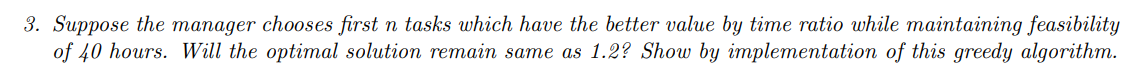

In [22]:
def sch_task_ratio(tasks, max_time):
    # Calculate value-to-time ratio for each task
    tasks_with_ratio = [(task[0], task[1], task[2], task[1] / task[2]) for task in tasks]
    # Sort tasks in descending order of value-to-time ratio
    sorted_tasks = sorted(tasks_with_ratio, key=lambda x: x[3], reverse=True)
    total_value = 0
    selected_tasks = []
    total_time = 0
    # Iterate through sorted tasks and select until time constraint is fulfilled
    for task in sorted_tasks:
        if total_time + task[2] <= max_time:
            selected_tasks.append(task[0])
            total_value += task[1]
            total_time += task[2]
        else:
            break
    return total_value, selected_tasks

# Tasks table: [Task No., Value, Time]
tasks = [
    [1, 10, 180], [2, 25, 180], [3, 33, 150], [4, 53, 150], [5, 15, 130],
    [6, 70, 210], [7, 52, 160], [8, 45, 175], [9, 32, 90], [10, 30, 120],
    [11, 20, 110], [12, 5, 60], [13, 17, 145], [14, 50, 180], [15, 37, 120],
    [16, 18, 120], [17, 71, 300], [18, 35, 300], [19, 60, 240], [20, 90, 500]
]

max_time = 2400
max_value, optimal_task_indices = sch_task_ratio(tasks, max_time)

# Print the results
print("Optimal Task Schedule:")
for task_no in optimal_task_indices:
    print(f"Task {task_no}")

print("Total Value:", max_value)

Optimal Task Schedule:
Task 9
Task 4
Task 6
Task 7
Task 15
Task 14
Task 8
Task 10
Task 19
Task 17
Task 3
Task 11
Total Value: 553


**Part4**
## Solution to Part 4 of the Knapsack Problem

To determine whether K ⊆ KC, KC ⊆ K, both, or neither, we need to analyze the relationships between the sets K and KC.

**Definitions**:
- K is the set of all feasible solutions to the knapsack problem, where each item can either be taken entirely (value 1) or not taken at all (value 0).
- KC is the set of all feasible solutions to the knapsack problem, where each item can either be taken entirely (value 1) or not taken at all (value 0), and additionally, it satisfies the condition that for every minimal cover C, the total number of items selected from C is strictly less than the size of C.

**Analysis**:
- K ⊆ KC: This statement is true. Any feasible solution in K is also a feasible solution in KC because KC includes all the solutions in K and imposes an additional constraint based on minimal covers. Since K includes all possible selections, it definitely includes those selections that satisfy the additional constraint of KC.
- KC ⊆ K: This statement is not necessarily true. While all feasible solutions in KC must also be feasible solutions in K, there may be solutions in K that are not in KC. Specifically, there may be solutions in K that violate the additional constraint imposed by KC related to minimal covers. Therefore, KC may be a subset of K, but it is not necessarily equal to K.

**Conclusion**:
- K ⊆ KC: True
- KC ⊆ K: Not necessarily true

In summary, every feasible solution in the knapsack set K is also a feasible solution in the knapsack set KC, but not every feasible solution in KC is necessarily a feasible solution in K.
